In [49]:
!pip install yfinance

^C
Traceback (most recent call last):
  File "/opt/conda/bin/pip", line 6, in <module>
    from pip._internal.cli.main import main
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/opt/conda/lib/python3.10/site-packages/pip/_internal/ut

In [50]:
import yfinance as yf
import pandas as pd

# Define the stock symbol
symbol = 'AAPL'

# Fetch the stock data
stock_data = yf.Ticker(symbol)

# Get real-time data for the past 1 day with 1-minute intervals
# Get 1-minute interval data for the past 60 days
df = stock_data.history(period='1y', interval='1d')

# Reset the index to have a column for the timestamp
df = df.reset_index()

# Print the first few rows
# print(df.head())

# # Reset the index to have a column for the timestamp
# df = df.reset_index()

# Print the first few rows
# print(df.head())
df=pd.DataFrame(df)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-08-14 00:00:00-04:00,177.268901,178.982126,176.611497,178.753036,43675600,0.0,0.0
1,2023-08-15 00:00:00-04:00,178.175321,178.772948,176.352528,176.750946,43622600,0.0,0.0
2,2023-08-16 00:00:00-04:00,176.432212,177.836645,175.804689,175.874420,46964900,0.0,0.0
3,2023-08-17 00:00:00-04:00,176.442159,176.810696,172.796574,173.314529,66062900,0.0,0.0
4,2023-08-18 00:00:00-04:00,171.621237,174.410210,171.282580,173.802612,61114200,0.0,0.0
...,...,...,...,...,...,...,...,...
246,2024-08-06 00:00:00-04:00,205.300003,209.990005,201.070007,207.229996,69660500,0.0,0.0
247,2024-08-07 00:00:00-04:00,206.899994,213.639999,206.389999,209.820007,63516400,0.0,0.0
248,2024-08-08 00:00:00-04:00,213.110001,214.199997,208.830002,213.309998,47161100,0.0,0.0
249,2024-08-09 00:00:00-04:00,212.100006,216.779999,211.970001,216.240005,42171700,0.0,0.0


In [51]:

df["Date"]=pd.to_datetime(df["Date"])
df['Year']=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Hour"]=df["Date"].dt.hour
df["Second"]=df["Date"].dt.second
df["Minute"]=df["Date"].dt.minute

In [52]:
df.nunique()

Date            251
Open            250
High            251
Low             251
Close           249
Volume          251
Dividends         3
Stock Splits      1
Year              2
Month            12
Day              31
Hour              1
Second            1
Minute            1
dtype: int64

In [53]:
new_df=df.drop(columns=["Date","Dividends","Stock Splits","Year","Hour","Second","Minute"])

In [54]:
new_df

,Open,High,Low,Close,Volume,Month,Day
0,177.268901,178.982126,176.611497,178.753036,43675600,8,14
1,178.175321,178.772948,176.352528,176.750946,43622600,8,15
2,176.432212,177.836645,175.804689,175.874420,46964900,8,16
3,176.442159,176.810696,172.796574,173.314529,66062900,8,17
4,171.621237,174.410210,171.282580,173.802612,61114200,8,18
...,...,...,...,...,...,...,...
246,205.300003,209.990005,201.070007,207.229996,69660500,8,6
247,206.899994,213.639999,206.389999,209.820007,63516400,8,7
248,213.110001,214.199997,208.830002,213.309998,47161100,8,8
249,212.100006,216.779999,211.970001,216.240005,42171700,8,9


In [55]:
X=new_df.drop(columns=["Close"])
Y=new_df[["Close"]]

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [57]:
random_reg=RandomForestRegressor()
random_reg.fit(X_train,Y_train)
random_reg.score(X_test,Y_test)

/tmp/ipykernel_33/3579553949.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_reg.fit(X_train,Y_train)


0.9932463991272668

In [58]:
y_pred=random_reg.predict(X_test)
y_pred_train=random_reg.predict(X_train)

In [59]:
X_test.head()

,Open,High,Low,Volume,Month,Day
155,169.769734,171.187808,169.350304,57388400,3,26
6,176.362471,176.980024,175.555664,42084200,8,22
164,168.471483,169.849619,168.121966,42451200,4,9
60,178.474115,181.721282,178.264951,70530000,11,7
113,194.707126,195.754371,192.602669,54822100,1,25


In [60]:
Y_test.head()

,Close
155,169.480133
6,176.531799
164,169.440170
60,181.103729
113,193.659882


In [61]:
y_pred

array([170.34022827, 176.26346558, 169.05435486, 179.96303116,
       194.0007196 , 184.81763977, 191.93571045, 210.53010208,
       176.90375656, 185.12988876, 167.2857251 , 208.60590134,
       215.31530212, 174.94925491, 189.30239594, 225.55039948,
       192.22002365, 188.39220993, 188.20102554, 177.59385162,
       218.53110535, 178.58614655, 191.09926849, 189.27575653,
       169.61822906, 175.30845505, 168.58379089, 179.13195419,
       172.55187454, 224.91699936, 219.5721019 , 170.87812012,
       213.73080261, 188.48536545, 177.69017166, 184.87897186,
       178.49618362, 189.37502869, 183.52751862, 194.34073578,
       184.03637589, 186.19966721, 191.39225342, 192.40540756,
       190.08634048, 185.70830032, 196.83758972, 189.06768356,
       172.22577576, 175.26238052, 166.52525986])

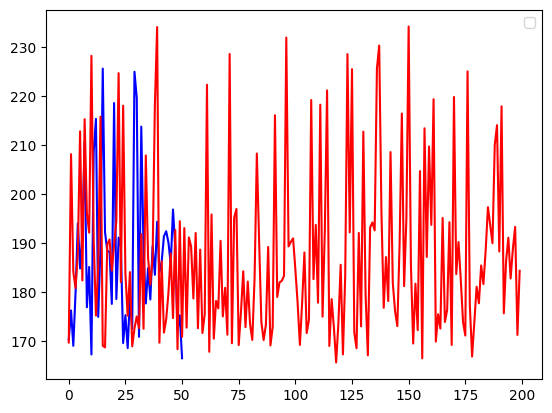

In [62]:
plt.plot(y_pred,color="blue")
plt.plot(y_pred_train,color="red")
plt.legend()
plt.show()

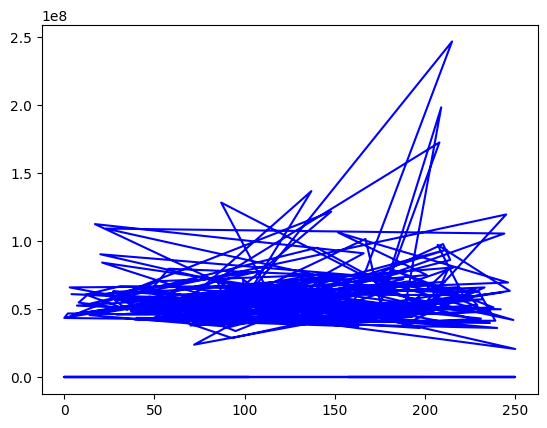

In [63]:
plt.plot(y_pred_train,color="red")
plt.plot(X_train,color="blue")
plt.show()

<Axes: >

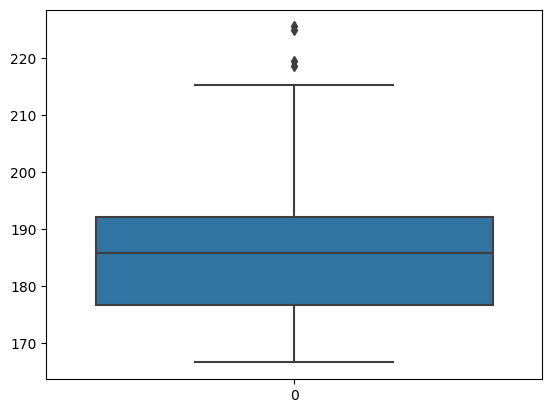

In [70]:
# for i in y_pred:
sns.boxplot(y_pred)

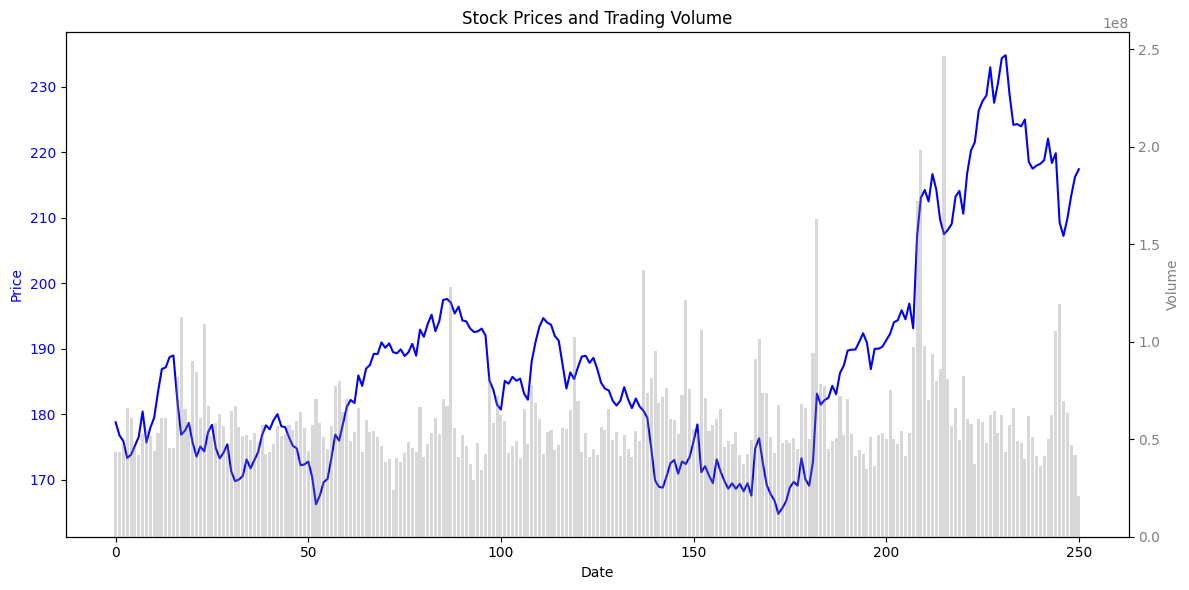

In [72]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing prices
ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot volume
ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='gray', alpha=0.3)
ax2.set_ylabel('Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title('Stock Prices and Trading Volume')
fig.tight_layout()
plt.show()



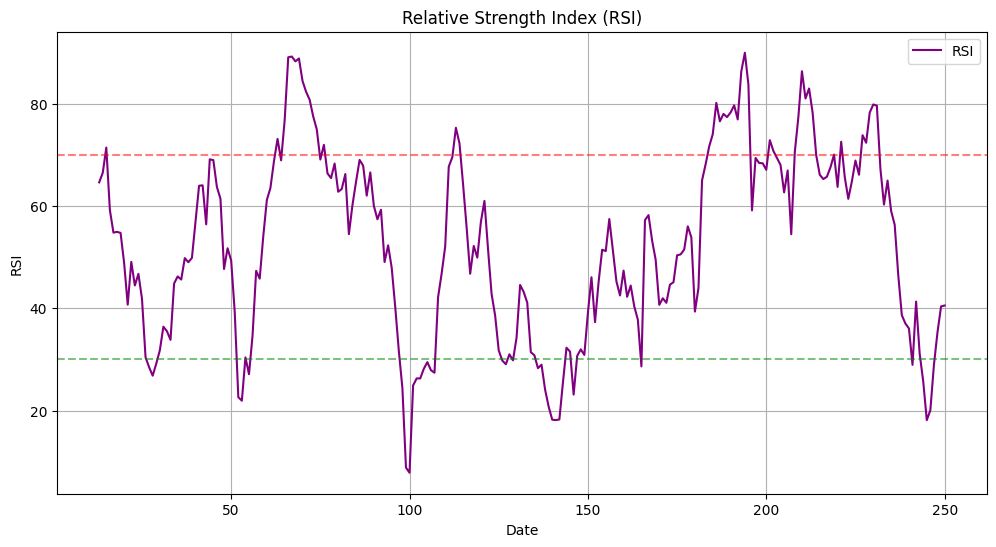

In [73]:
import numpy as np

# Calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'])

# RSI plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.5)
plt.axhline(30, linestyle='--', color='green', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()


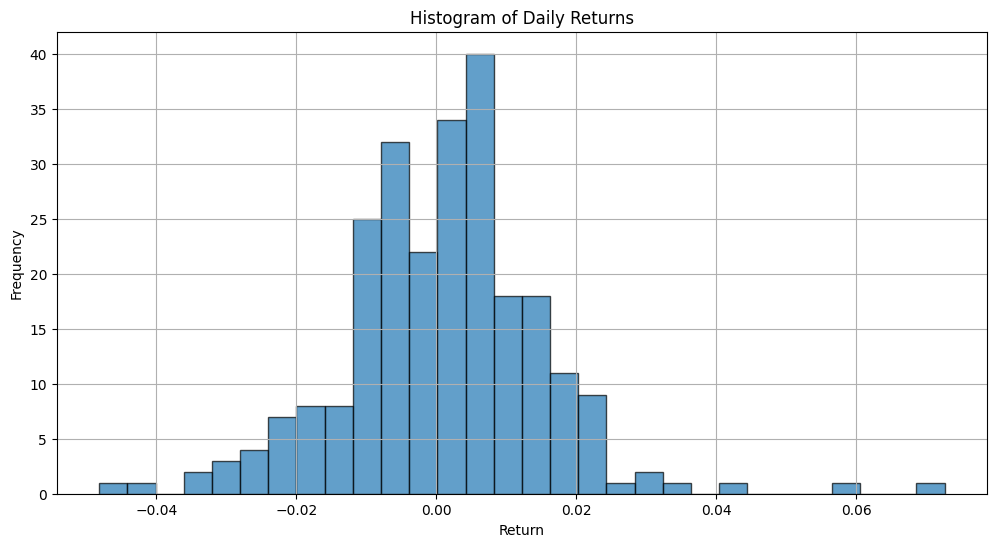

In [74]:
# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Histogram of returns
plt.figure(figsize=(12, 6))
plt.hist(df['Return'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.grid(True)
plt.show()


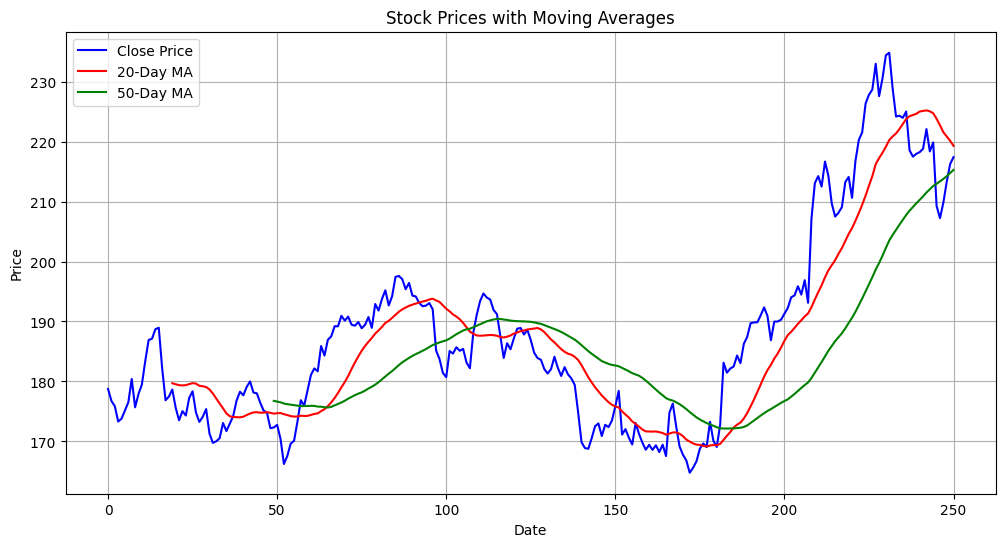

In [75]:
# Calculate moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Line plot with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['MA20'], label='20-Day MA', color='red')
plt.plot(df.index, df['MA50'], label='50-Day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()
